# Effect of Economic, Social, and Cultural Opportunity on Students' Academic Performance

**Author:** Tran Anh Tong

# Investigation Overview

In this investigation, I wanted to look at how economic, social, and cultural opportunity affects the academic performance of students worldwide via PISA.

## Dataset Overview

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science. The dataset included more than 600 dimensions, including an index of how the student's economic, social, and cultural status compared to the broader population. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa2012_clean.csv')
df_clean = df.copy()

C:\Users\songc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Countries with the most advantaged students

Iceland had by far the largest percentage of advantaged students. No other country had more than 30%. Canada, Qatar, Norway, and Finland rounded out the top five.

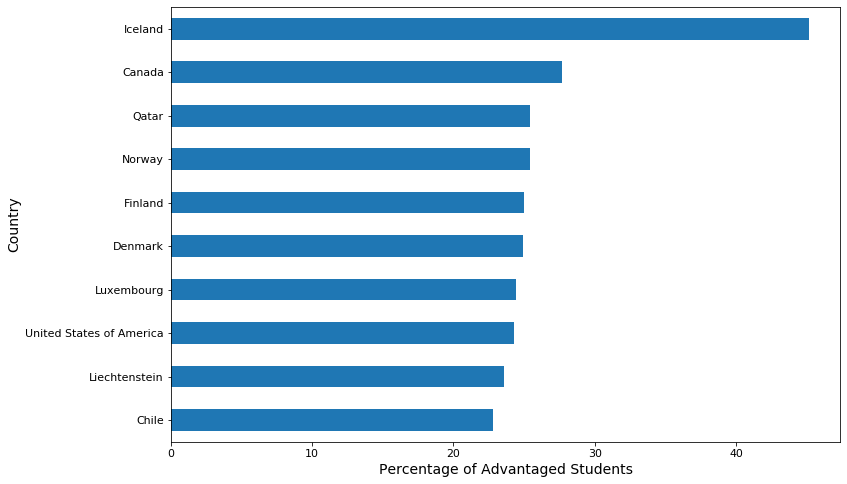

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
dt = (df_clean.query('ad == 1').groupby('country')['student_id'].count() /
      df_clean.groupby('country')['student_id'].count()).sort_values() * 100
dt.dropna().tail(10).plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Percentage of Advantaged Students", fontsize=14)
plt.show()

## Countries with the most disadvantaged students

On the other hand, several countries had > 50% of their students from disadvantaged backgrounds. Indonesia, Turkey, Peru, Brazil, and Thailand had the highest percentage of disadvantaged students.

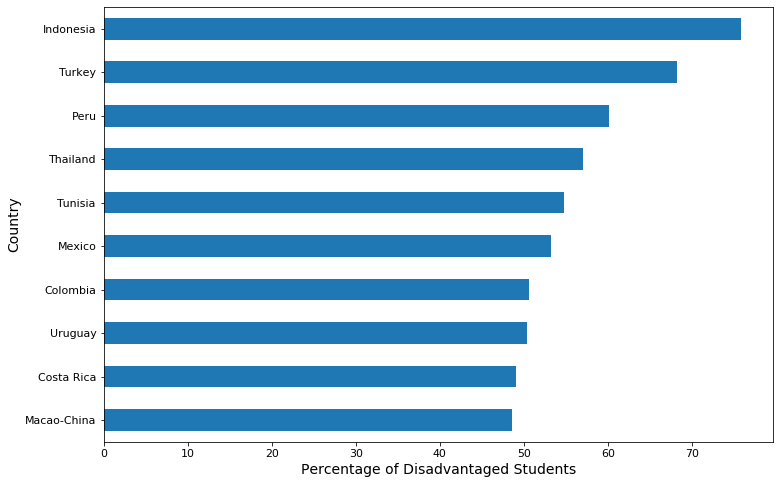

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
dt = (df_clean.query('disad == 1').groupby('country')['student_id'].count() /
      df_clean.groupby('country')['student_id'].count()).sort_values()* 100
dt.dropna().tail(10).plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Percentage of Disadvantaged Students", fontsize=14)
plt.show()

## Nations with the highest economic, social, and cultural status

When we look at the overall economic, social, and cultural status for each nation, we can see that the top countries are primarily free nations on the _Freedom House_ Civil Liberties scale.


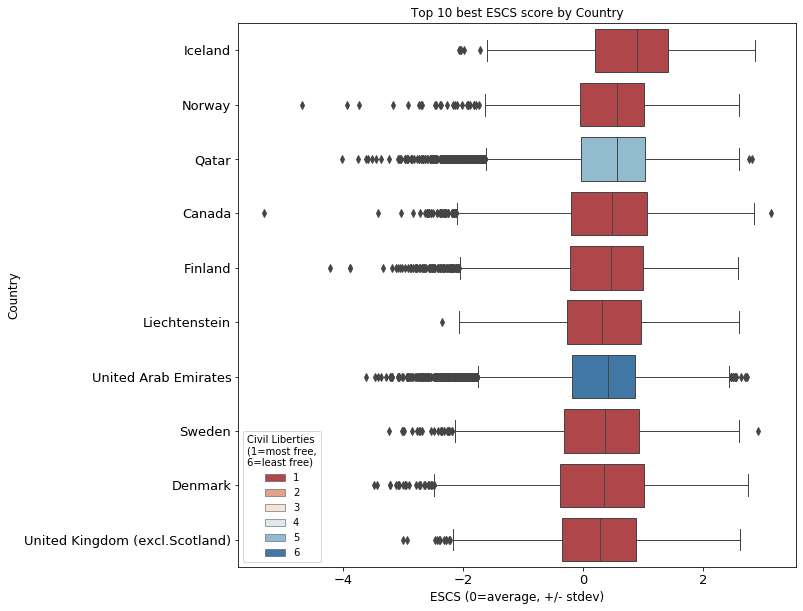

In [5]:
df_ana = df_clean.groupby('country')['ESCS'].mean().sort_values(
    ascending=False).dropna().head(10)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.boxplot(data=df_clean,
            y='country',
            x='ESCS',
            order=df_ana.index.get_level_values('country'),
            dodge=False,
            palette='RdBu',
            hue='civil_liberties',
            width=0.8,
            linewidth=1)
ax.set_ylabel("Country", fontsize=12)
ax.set_xlabel("ESCS (0=average, +/- stdev)", fontsize=12)
legend = ax.legend(loc='best', title_fontsize=10).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=13)
ax.set_title("Top 10 best ESCS score by Country")
plt.show()

## Nations with the lowest economic, social, and cultural status

The bottom countries score worse on the _Freedom House_ Civil Liberties scale. Costa Rica is the only country in the bottom ten that scores 1 (most free) on this index.

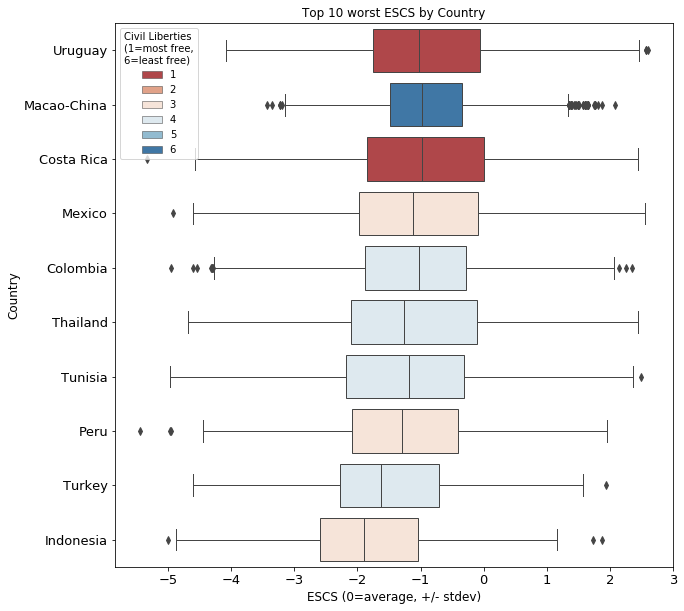

In [6]:
df_ana = df_clean.groupby('country')['ESCS'].mean().sort_values(
    ascending=False).dropna().tail(10)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.boxplot(data=df_clean,
            y='country',
            x='ESCS',
            order=df_ana.index.get_level_values('country'),
            dodge=False,
            palette='RdBu',
            hue='civil_liberties',
            width=0.8,
            linewidth=1)
ax.set_ylabel("Country", fontsize=12)
ax.set_xlabel("ESCS (0=average, +/- stdev)", fontsize=12)
legend = ax.legend(loc='best', title_fontsize=10).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=13)
ax.set_title("Top 10 worst ESCS by Country")
plt.show()

## Overall Literacy Scores by Country and Civil Liberties

We look at overall literacy by civil liberties category (1 = most free, 6 = least free), we can see that least free countries seem to perform the best (China).

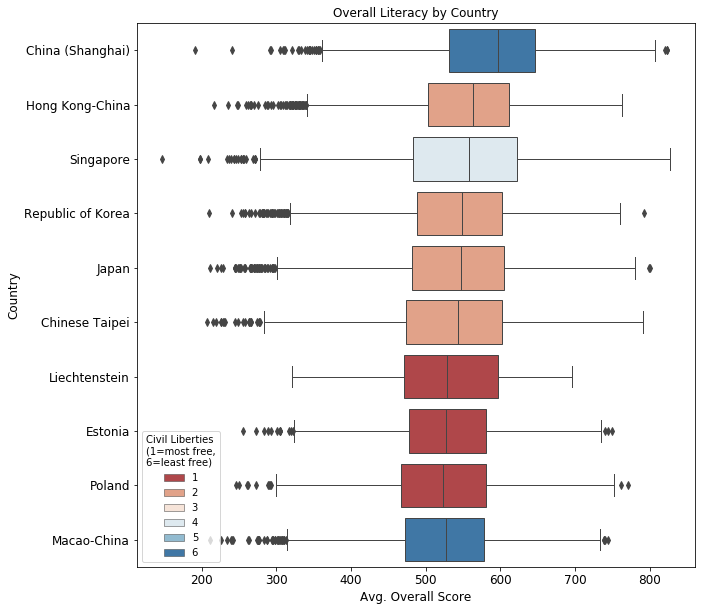

In [7]:
df_ana = df_clean.groupby('country')['overall_score'].mean().sort_values(
    ascending=False).head(10)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.boxplot(data=df_clean,
            y='country',
            x='overall_score',
            order=df_ana.index.get_level_values('country'),
            dodge=False,
            palette='RdBu',
            hue='civil_liberties',
            width=0.8,
            linewidth=1)
ax.set_ylabel("Country", fontsize=12)
ax.set_xlabel("Avg. Overall Score", fontsize=12)
legend = ax.legend(loc='best', title_fontsize=10).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=12)
ax.set_title("Overall Literacy by Country")
plt.show()

## Overall Literacy Scores by Opportunity

We defined student to be "advantaged" if they were +1 or higher standard deviations above the mean in opportunity. They are "disadvantaged" if the are -1 or lower standard deviations below the mean. We can see that children who are advantaged perform better in overall academic literacy.

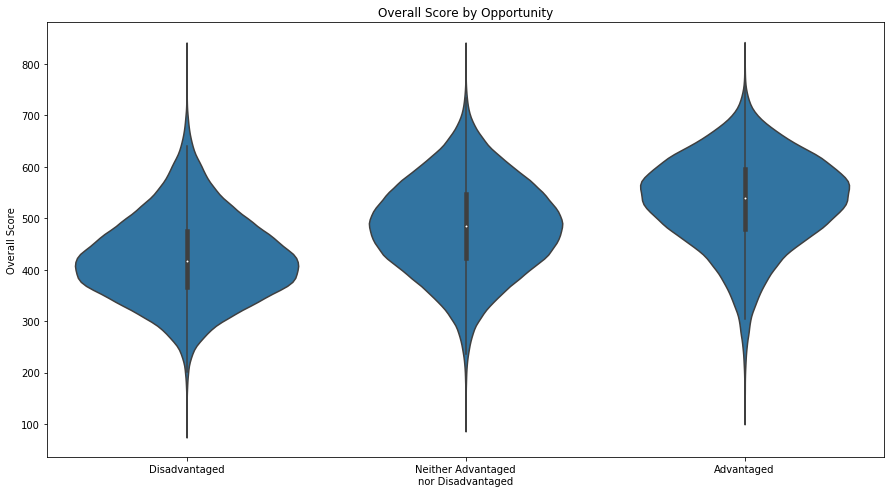

In [8]:
base_color = sns.color_palette()[0]
df_dis = pd.DataFrame(df_clean.query('disad == 1'),
                   columns=['overall_score']).assign(opp='Disadvantaged')
df_nor = pd.DataFrame(df_clean.query('ad == 0 and disad == 0'),
                   columns=['overall_score'
                           ]).assign(opp='Neither Advantaged\nnor Disadvantaged')
df_ad = pd.DataFrame(df_clean.query('ad == 1'),
                   columns=['overall_score']).assign(opp='Advantaged')

cdf = pd.concat([df_dis, df_nor, df_ad])

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.violinplot(x='opp', y='overall_score', data=cdf, color = base_color)
ax.set_xlabel(None)
ax.set_ylabel("Overall Score")
ax.set_title("Overall Score by Opportunity")
plt.show()

In [9]:
!jupyter nbconvert PISA_presentation.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook PISA_presentation.ipynb to slides
[NbConvertApp] Writing 307987 bytes to PISA_presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\songc\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\songc\anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\songc\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\songc\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\songc\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C: